# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import statsmodels.api as sm

In [2]:
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [3]:
athletes = pd.read_csv("athletes.csv")

In [4]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [5]:
athletes.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [6]:
athletes[['height','weight']].describe()

,height,weight
count,11208.000000,10879.000000
mean,1.766282,72.068205
std,0.112719,16.177334
min,1.210000,31.000000
25%,1.690000,60.000000
50%,1.760000,70.000000
75%,1.840000,81.000000
max,2.210000,170.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026898032370>,
      dtype=object)

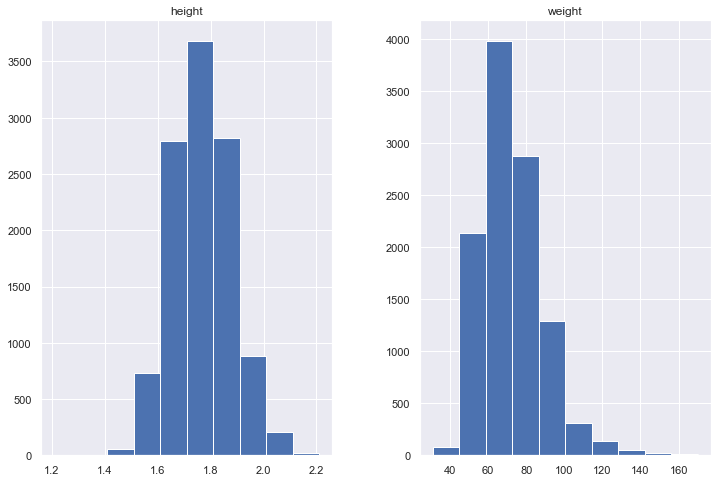

In [7]:
athletes[['height','weight']].hist()

In [8]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False) #retorna uma array com index das colunas 
    
    return df.loc[random_idx, col_name] #retorna uma series com index e valor da coluna

## Inicia sua análise a partir daqui

In [9]:
# Sua análise começa aqui.

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [10]:
def q1():
    amostra_q1 = get_sample(athletes,'height', n=3000, seed=42)
    stat, p = sct.shapiro(amostra_q1)
    print('stat= {}, p={}'.format(stat,p))
    return bool(p> 0.05)

In [11]:
q1()

stat= 0.9961519837379456, p=5.681722541339695e-07


False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

In [12]:
amostra_q1 = get_sample(athletes,'height', n=3000, seed=42)

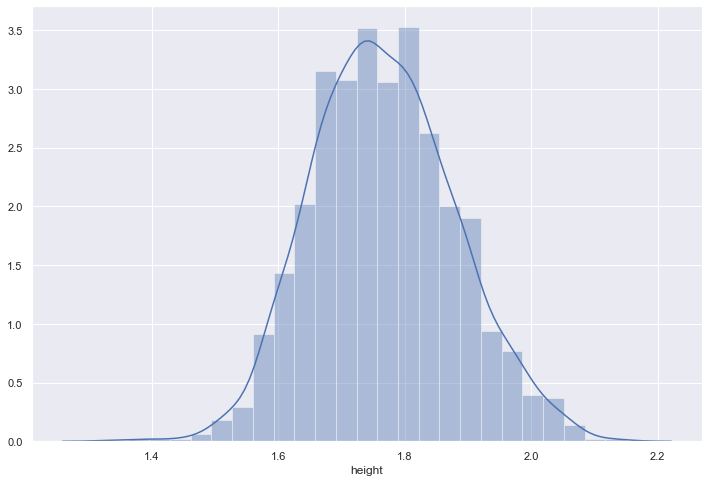

In [13]:
sns.distplot(amostra_q1, bins=25, hist_kws={"density": True})
plt.show ()

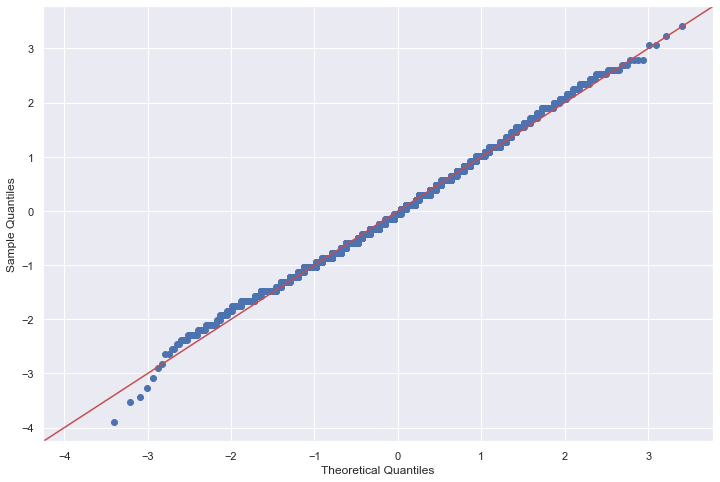

In [14]:
sm.qqplot(amostra_q1, fit=True, line="45")
plt.show ()

In [15]:
amostra_q1 = get_sample(athletes,'height', n=3000, seed=42)
stat, p = sct.shapiro(amostra_q1)
p > 0.0000001

True

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [16]:
def q2():
    amostra_q2 = get_sample(athletes,'height', n=3000, seed=42)
    stat, p = sct.jarque_bera(amostra_q2)
    print('stat= {}, p={}'.format(stat,p))
    return bool(p> 0.05)

In [17]:
q2()

stat= 13.03363513594265, p=0.001478366424594868


False

__Para refletir__:

* Esse resultado faz sentido?

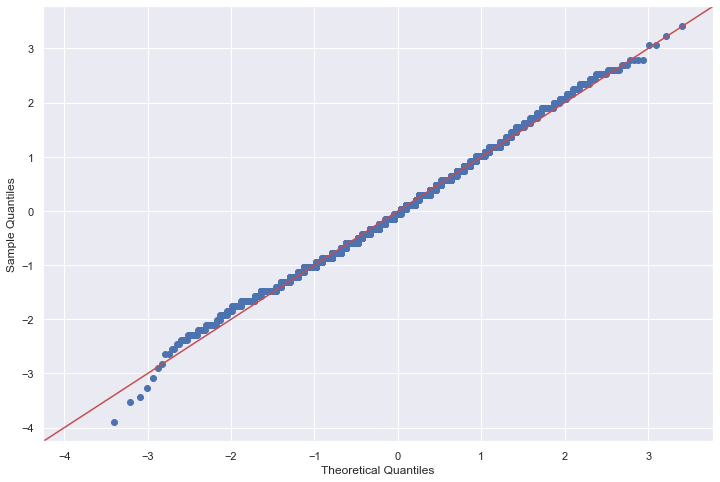

In [18]:
amostra_q2 = get_sample(athletes,'height', n=3000, seed=42)
sm.qqplot(amostra_q2, fit=True, line="45")
plt.show ()

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [19]:
def q3():
    amostra_q3 = get_sample(athletes,'weight', n=3000, seed=42)
    stat, p = sct.normaltest(amostra_q3)
    print('stat= {}, p={}'.format(stat,p))
    return bool(p> 0.05)

In [20]:
q3()

stat= 510.24655809881176, p=1.5898922918029537e-111


False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

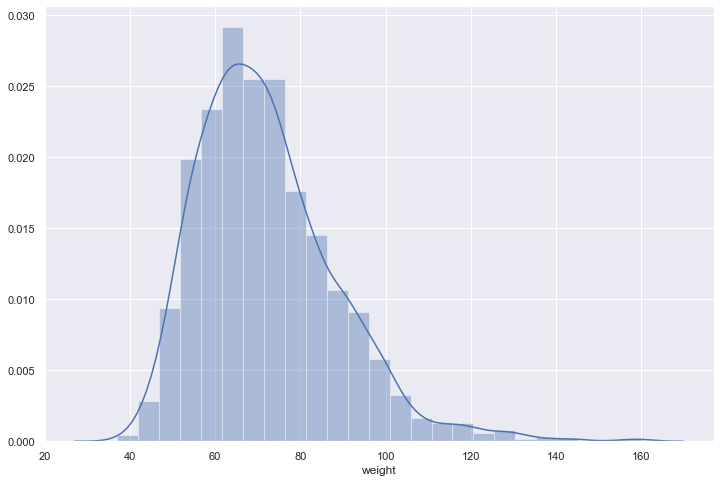

In [21]:
amostra_q3 = get_sample(athletes,'weight', n=3000, seed=42)
sns.distplot(amostra_q3, bins=25, hist_kws={"density": True})
plt.show ()

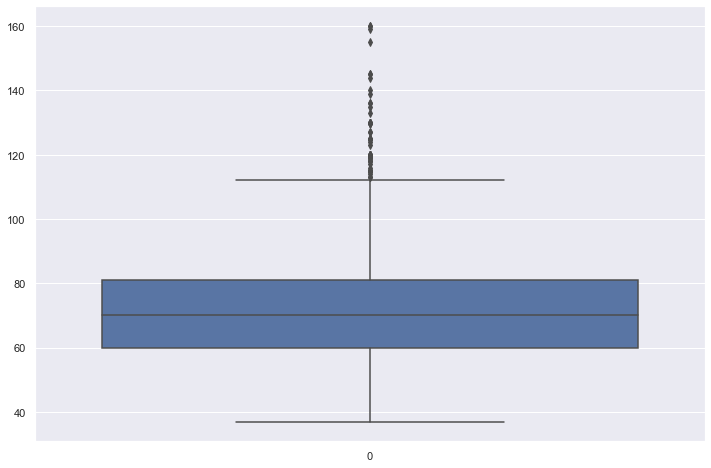

In [22]:
sns.boxplot(data = amostra_q3)

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [23]:
def q4():
    amostra_q4 = get_sample(athletes,'weight', n=3000, seed=42)
    amostra_q4_transformada = np.log(amostra_q4)
    stat, p = sct.normaltest(amostra_q4_transformada)
    print('stat= {}, p={}'.format(stat,p))
    return bool(p> 0.05)    

In [24]:
q4()

stat= 45.91534331977353, p=1.0705572101256944e-10


False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

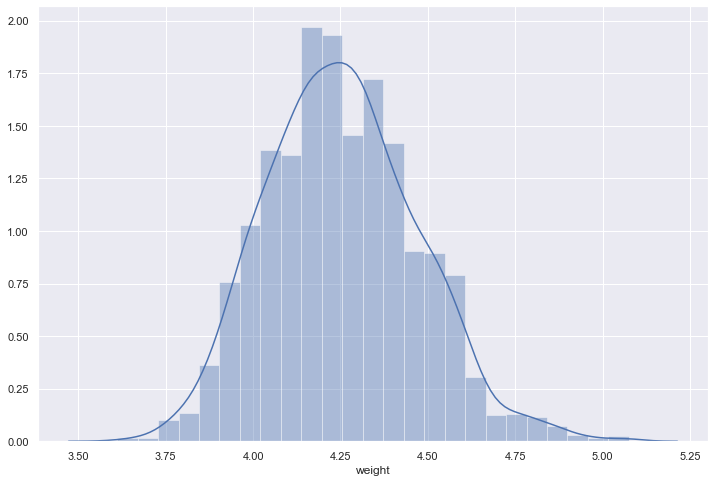

In [25]:
amostra_q4 = get_sample(athletes,'weight', n=3000, seed=42)
amostra_q4_transformada = np.log(amostra_q4)
sns.distplot(amostra_q4_transformada, bins=25, hist_kws={"density": True})
plt.show ()

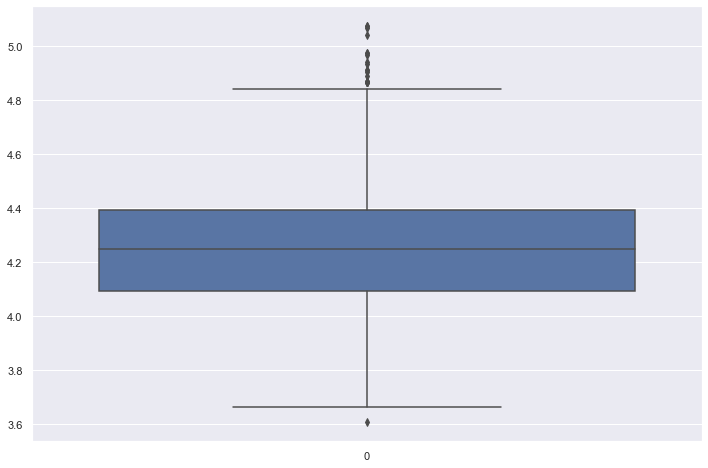

In [26]:
sns.boxplot(data = amostra_q4_transformada)

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [27]:
athletes.columns

Index(['id', 'name', 'nationality', 'sex', 'dob', 'height', 'weight', 'sport',
       'gold', 'silver', 'bronze'],
      dtype='object')

In [45]:
athletes[(athletes.nationality == 'BRA') | (athletes.nationality == 'USA') | (athletes.nationality == 'CAN')]

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
6,266237702,Aaron Russell,USA,male,6/4/93,2.05,98.0,volleyball,0,0,1
13,376068084,Abbey D'Agostino,USA,female,5/25/92,1.61,49.0,athletics,0,0,0
14,162792594,Abbey Weitzeil,USA,female,12/3/96,1.78,68.0,aquatics,1,1,0
64,884912136,Abigail Johnston,USA,female,11/16/89,1.66,61.0,aquatics,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11404,409923311,Yuri van der Heijden,BRA,male,7/20/90,1.78,76.0,hockey,0,0,0
11436,306067063,Zach Garrett,USA,male,4/8/95,1.78,63.0,archery,0,1,0
11437,995684067,Zach Ziemek,USA,male,2/23/93,1.94,88.0,athletics,0,0,0
11439,99932834,Zack Test,USA,male,10/13/89,1.91,92.0,rugby sevens,0,0,0


In [28]:
bra = athletes[athletes.nationality == 'BRA']
usa = athletes[athletes.nationality == 'USA']
can = athletes[athletes.nationality == 'CAN']

In [29]:
bra['height'].describe()

count    476.000000
mean       1.764034
std        0.117388
min        1.330000
25%        1.680000
50%        1.755000
75%        1.840000
max        2.110000
Name: height, dtype: float64

In [30]:
bra.isna().sum()

id              0
name            0
nationality     0
sex             0
dob             0
height          9
weight         19
sport           0
gold            0
silver          0
bronze          0
dtype: int64

In [31]:
usa['height'].describe()

count    560.000000
mean       1.787768
std        0.118962
min        1.450000
25%        1.710000
50%        1.780000
75%        1.880000
max        2.210000
Name: height, dtype: float64

In [32]:
usa.isna().sum()

id              0
name            0
nationality     0
sex             0
dob             0
height          7
weight         15
sport           0
gold            0
silver          0
bronze          0
dtype: int64

In [46]:
can['height'].describe()

count    320.000000
mean       1.758594
std        0.118036
min        1.450000
25%        1.670000
50%        1.750000
75%        1.830000
max        2.080000
Name: height, dtype: float64

In [47]:
can.isna().sum()

id             0
name           0
nationality    0
sex            0
dob            0
height         1
weight         4
sport          0
gold           0
silver         0
bronze         0
dtype: int64

In [33]:
def q5():
    stat, p = sct.ttest_ind(bra['height'], usa['height'],  equal_var = False, nan_policy = 'omit') #False: se falso, execute o teste t de Welch, que não assume igual variação populaciona
    print('stat= {}, p={}'.format(stat,p))
    return bool(p> 0.05)

In [34]:
q5()

stat= -3.2232436467501855, p=0.0013080041830140115


False

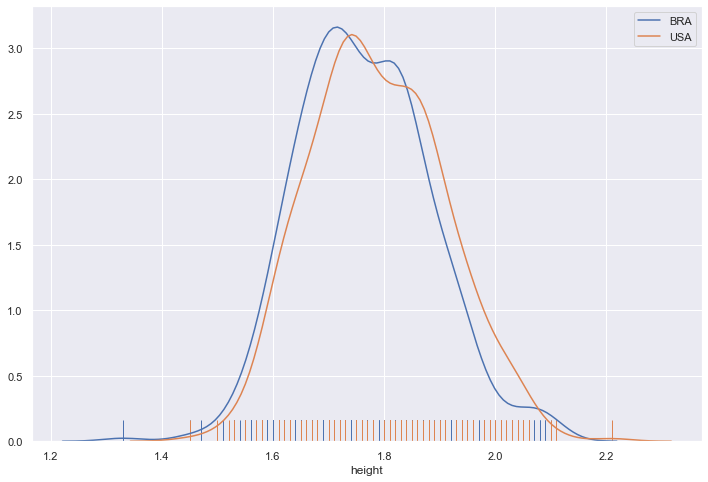

In [35]:
sns.distplot(bra['height'], bins=25, hist=False, rug=True, label='BRA')
sns.distplot(usa['height'], bins=25, hist=False, rug=True, label='USA')

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [48]:
def q6():
    stat, p = sct.ttest_ind(bra['height'], can['height'],  equal_var = False, nan_policy = 'omit') #False: se falso, execute o teste t de Welch, que não assume igual variação populaciona
    print('stat= {}, p={}'.format(stat,p))
    return bool(p> 0.05)

In [49]:
q6()

stat= 0.6389304914365109, p=0.5230827295440921


True

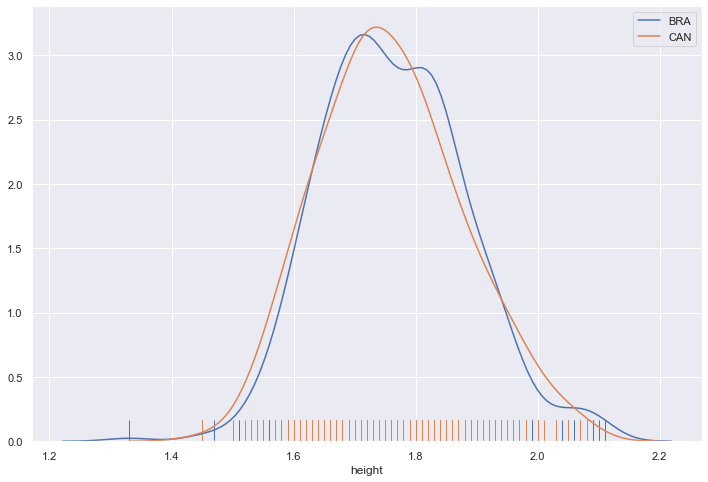

In [50]:
sns.distplot(bra['height'], bins=25, hist=False, rug=True, label='BRA')
sns.distplot(can['height'], bins=25, hist=False, rug=True, label='CAN')

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [87]:
def q7():
    stat, p = sct.ttest_ind(usa['height'], can['height'],  equal_var = False, nan_policy = 'omit') #False: se falso, execute o teste t de Welch, que não assume igual variação populaciona
    print('stat= {}, p={}'.format(stat,p))
    if p > 0.05:
        print('Probably the same distribution')
    else:
        print('Probably different distributions')
    return float(np.round(p, 8)) 

In [88]:
q7()

stat= 3.516987632488539, p=0.0004660129347388888
Probably different distributions


0.00046601

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?

In [72]:
stat, p = sct.ttest_ind(usa['height'], can['height'],  equal_var = True, nan_policy = 'omit')
print('stat= {}, p={}'.format(stat,p))

stat= 3.5094939427693164, p=0.00047178571523938005


In [69]:
#grau de liberdade para o teste t independente com variancias semelhantes: df = n1 + n2 - 2
gl = len(usa) + len(can) - 2
print(f"Graus de liberdade: {gl}")
q7_sf = sct.t.sf(stat, gl)*2 #Para Hipótese Bicaudal
print(q7_sf)

Graus de liberdade: 878
0.0004588455971858319


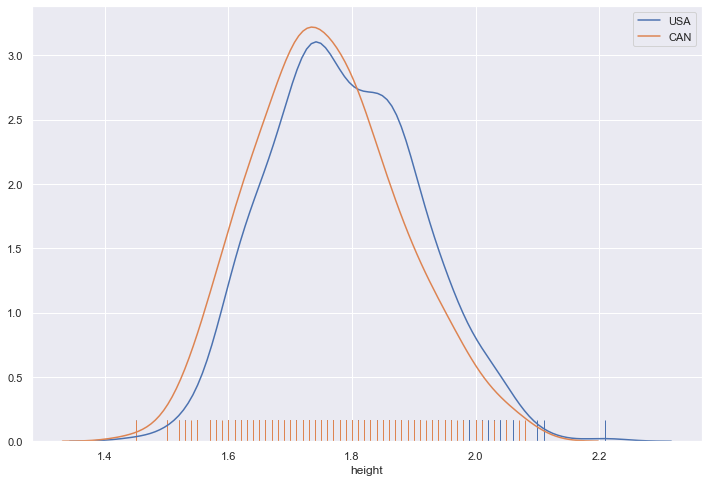

In [77]:
sns.distplot(usa['height'], bins=25, hist=False, rug=True, label='USA')
sns.distplot(can['height'], bins=25, hist=False, rug=True, label='CAN')